In [1]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images from (28,28) -> (784,)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [3]:
# Function to build autoencoder

def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    h = Dense(128, activation='relu')(input_img)   # extra hidden layer
    encoded = Dense(latent_dim, activation='relu')(h)
    decoded = Dense(784, activation='sigmoid')(encoded)


    # Define models
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    # Build decoder separately for visualization
    encoded_input = Input(shape=(latent_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))

    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder, decoder

In [4]:
# Function to build autoencoder

def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    h = Dense(128, activation='relu')(input_img)   # extra hidden layer
    encoded = Dense(latent_dim, activation='relu')(h)
    decoded = Dense(784, activation='sigmoid')(encoded)


    # Define models
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    # Build decoder separately for visualization
    encoded_input = Input(shape=(latent_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))

    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder, decoder


Training Autoencoder with Latent Dimension = 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


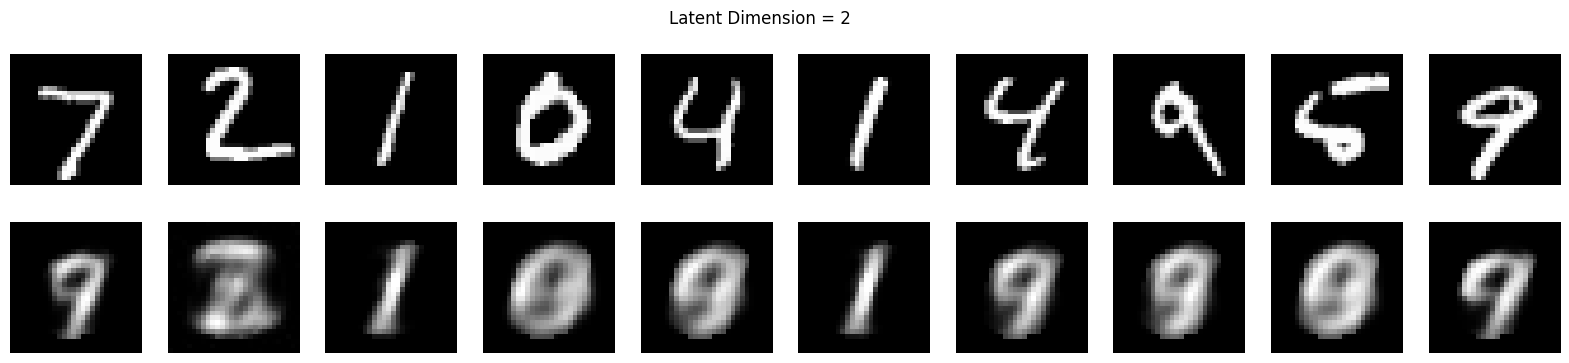


Training Autoencoder with Latent Dimension = 10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


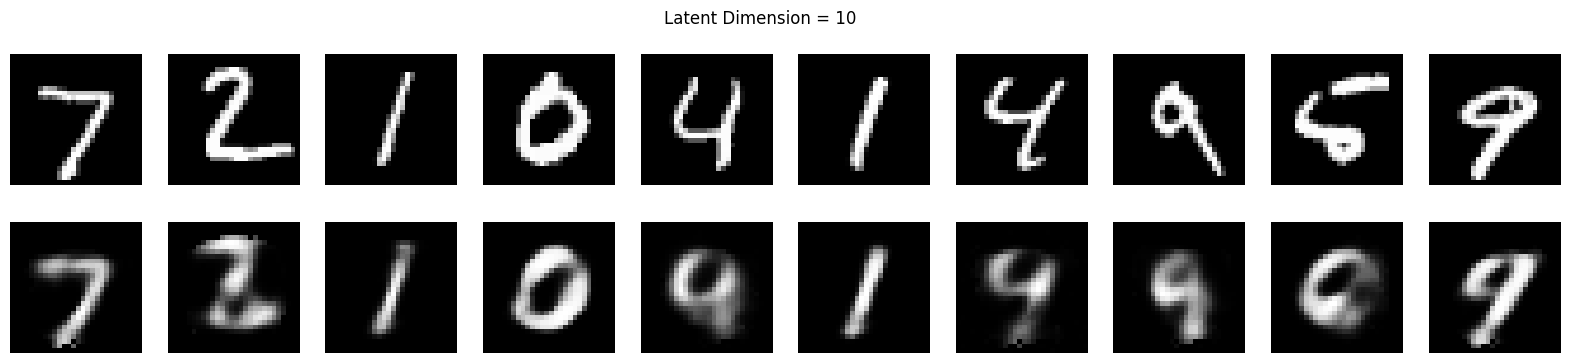


Training Autoencoder with Latent Dimension = 50


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


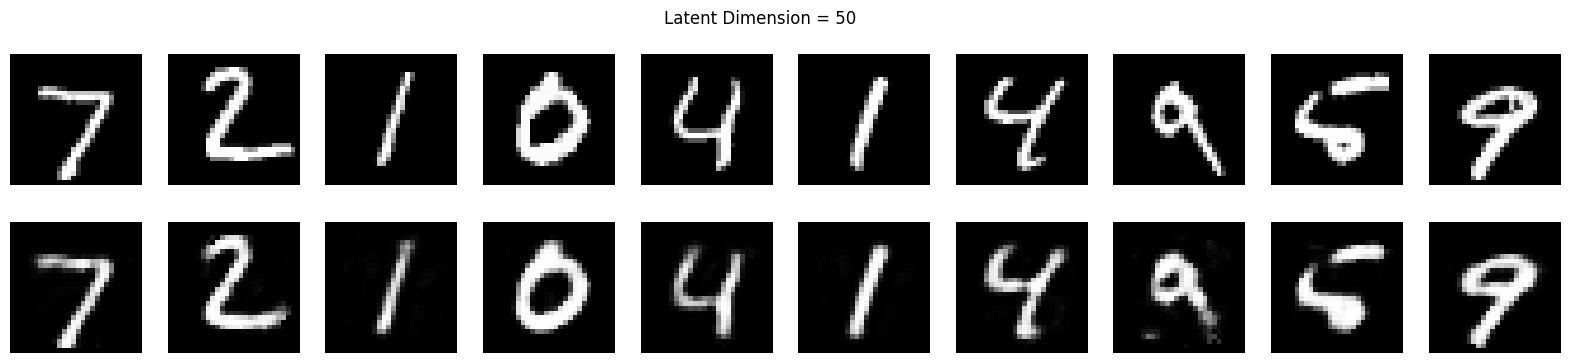

In [6]:
# Train for different latent dimensions

latent_dims = [2, 10, 50]

for dim in latent_dims:
    print(f"\nTraining Autoencoder with Latent Dimension = {dim}")
    autoencoder, encoder, decoder = build_autoencoder(dim)

    autoencoder.fit(x_train, x_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)

    # Reconstruct test images
    decoded_imgs = autoencoder.predict(x_test[:10])

    # Visualization

    n = 10  # display 10 digits
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Latent Dimension = {dim}")
    plt.show()